In [1]:
import pandas as pd;

# loading data
online_retail_df = pd.read_csv("online_retail.csv")

In [2]:
#inspecting data
print(online_retail_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB
None


In [3]:
print(online_retail_df.describe())

           Quantity         Price    Customer ID
count  1.067371e+06  1.067371e+06  824364.000000
mean   9.938898e+00  4.649388e+00   15324.638504
std    1.727058e+02  1.235531e+02    1697.464450
min   -8.099500e+04 -5.359436e+04   12346.000000
25%    1.000000e+00  1.250000e+00   13975.000000
50%    3.000000e+00  2.100000e+00   15255.000000
75%    1.000000e+01  4.150000e+00   16797.000000
max    8.099500e+04  3.897000e+04   18287.000000


In [4]:
print(online_retail_df.isnull().sum())

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64


In [5]:
#remove duplicates
online_retail_df.drop_duplicates(inplace=True)

In [6]:
#drop rows without Customer ID s( Customer Id is essential for customer level analysis threfore dropping rows without customer id)
print(f"before: {online_retail_df.shape}")
online_retail_df.dropna(subset=["Customer ID"],inplace=True)
print(f"after: {online_retail_df.shape}")

before: (1033036, 8)
after: (797885, 8)


In [7]:
#Removing Cancelled orders
print(f"before : {online_retail_df.shape}")
online_retail_df = online_retail_df[~online_retail_df["Invoice"].astype(str).str.startswith("C")]
print(f"after : {online_retail_df.shape}")

before : (797885, 8)
after : (779495, 8)


In [8]:
#checking zero price rows
zero_price_df = online_retail_df[online_retail_df['Price'] == 0.0]

#Checking what and how many products are zero price
print(f"Number of zero price rows: {zero_price_df.shape[0]}")
print(zero_price_df["Description"].value_counts().head(30))


Number of zero price rows: 70
Description
Manual                               7
CHRISTMAS PUDDING TRINKET POT        2
This is a test product.              2
REGENCY CAKESTAND 3 TIER             2
DOOR MAT FAIRY CAKE                  1
CHRISTMAS CRAFT WHITE FAIRY          1
ANTIQUE LILY FAIRY LIGHTS            1
 FLAMINGO LIGHTS                     1
ANTIQUE GLASS HEART DECORATION       1
CHARLOTTE BAG , SUKI DESIGN          1
RETRO SPOT LARGE MILK JUG            1
VINTAGE GLASS COFFEE CADDY           1
6 RIBBONS EMPIRE                     1
CAST IRON HOOK GARDEN TROWEL         1
CAST IRON HOOK GARDEN FORK           1
HANGING METAL BIRD BATH              1
AIRLINE BAG VINTAGE JET SET WHITE    1
SET/5 RED SPOTTY LID GLASS BOWLS     1
DOORMAT HOME SWEET HOME BLUE         1
TV DINNER TRAY DOLLY GIRL            1
MILK PAN PINK RETROSPOT              1
POLYESTER FILLER PAD 45x45cm         1
CAKE STAND LACE WHITE                1
DOLLY GIRL LUNCH BOX                 1
NOEL WOODEN BLOCK LETT

In [9]:
#identifying test entries
test_entries = ["Manual", "This is a test product."]
zero_price_tests = zero_price_df[zero_price_df["Description"].isin(test_entries)]
print(f"Number of test entries: {zero_price_tests.shape[0]}")
print(zero_price_tests)

Number of test entries: 9
        Invoice StockCode              Description  Quantity  \
16107    490727         M                   Manual         1   
89084    497819   TEST001  This is a test product.         5   
89180    497843   TEST001  This is a test product.         5   
811118   561916         M                   Manual         1   
887286   568384         M                   Manual         1   
920990   571035         M                   Manual         1   
962422   574252         M                   Manual         1   
1005014  577168         M                   Manual         1   
1011446  577696         M                   Manual         1   

                 InvoiceDate  Price  Customer ID         Country  
16107    2009-12-07 16:38:00    0.0      17231.0  United Kingdom  
89084    2010-02-12 14:58:00    0.0      14103.0  United Kingdom  
89180    2010-02-12 15:47:00    0.0      14827.0  United Kingdom  
811118   2011-08-01 11:44:00    0.0      15581.0  United Kingdom 

In [10]:
#removing test enties from online_retail_df
print(f"Number of rows before removing test entries: {online_retail_df.shape[0]}")
online_retail_df = online_retail_df[~((online_retail_df['Price'] == 0.0) & (online_retail_df['Description'].isin(test_entries)))]
print(f"Number of rows after removing test entries: {online_retail_df.shape[0]}")

Number of rows before removing test entries: 779495
Number of rows after removing test entries: 779486


In [11]:
#Extracting Promotional data from main dataframe
promotional_df = online_retail_df[online_retail_df['Price'] == 0.0]
print(f"Number of promotional rows: {promotional_df.shape[0]}")
print(promotional_df["Description"].value_counts().head(30))

Number of promotional rows: 61
Description
CHRISTMAS PUDDING TRINKET POT        2
REGENCY CAKESTAND 3 TIER             2
6 RIBBONS EMPIRE                     1
CHRISTMAS CRAFT WHITE FAIRY          1
ANTIQUE LILY FAIRY LIGHTS            1
ANTIQUE GLASS HEART DECORATION       1
 FLAMINGO LIGHTS                     1
CHARLOTTE BAG , SUKI DESIGN          1
RETRO SPOT LARGE MILK JUG            1
VINTAGE GLASS COFFEE CADDY           1
DOOR MAT FAIRY CAKE                  1
CAST IRON HOOK GARDEN TROWEL         1
CAST IRON HOOK GARDEN FORK           1
HANGING METAL BIRD BATH              1
AIRLINE BAG VINTAGE JET SET WHITE    1
SET/5 RED SPOTTY LID GLASS BOWLS     1
DOORMAT HOME SWEET HOME BLUE         1
TV DINNER TRAY DOLLY GIRL            1
MILK PAN PINK RETROSPOT              1
POLYESTER FILLER PAD 45x45cm         1
CAKE STAND LACE WHITE                1
DOLLY GIRL LUNCH BOX                 1
NOEL WOODEN BLOCK LETTERS            1
RED RETROSPOT CAKE STAND             1
IVORY KITCHEN SCALES 

In [12]:
#Removing all remaining zero price rows
print(f"Number of rows before removing zero price rows: {online_retail_df.shape[0]}")
online_retail_df = online_retail_df[online_retail_df['Price'] > 0.0]
print(f"Number of rows after removing zero price rows: {online_retail_df.shape[0]}")

Number of rows before removing zero price rows: 779486
Number of rows after removing zero price rows: 779425


In [13]:
#Checking stock codes of remaining rows
print(online_retail_df['StockCode'].value_counts().head(30))

StockCode
85123A    5023
22423     3335
85099B    3296
84879     2692
20725     2609
21212     2557
47566     2098
20727     2045
22383     2039
21034     1950
21232     1935
22382     1935
22384     1874
21754     1852
22139     1848
20914     1821
22469     1821
20728     1820
84991     1813
POST      1803
22197     1794
82494L    1790
22386     1787
22470     1783
22138     1753
22086     1737
21931     1728
21080     1696
22411     1691
82482     1672
Name: count, dtype: int64


In [14]:
#Removing rows with stock code 'POST'
print(f"Number of rows before removing POST stock code: {online_retail_df.shape[0]}")
online_retail_df = online_retail_df[online_retail_df['StockCode'] != 'POST']
print(f"Number of rows after removing POST stock code: {online_retail_df.shape[0]}")

Number of rows before removing POST stock code: 779425
Number of rows after removing POST stock code: 777622


In [15]:
#Creating total price column
online_retail_df['TotalPrice'] = online_retail_df['Quantity'] * online_retail_df['Price']
print(online_retail_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 777622 entries, 0 to 1067369
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      777622 non-null  object 
 1   StockCode    777622 non-null  object 
 2   Description  777622 non-null  object 
 3   Quantity     777622 non-null  int64  
 4   InvoiceDate  777622 non-null  object 
 5   Price        777622 non-null  float64
 6   Customer ID  777622 non-null  float64
 7   Country      777622 non-null  object 
 8   TotalPrice   777622 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 59.3+ MB
None


In [16]:
#Converting Invoice date to Datetime
online_retail_df['InvoiceDate'] = pd.to_datetime(online_retail_df['InvoiceDate'])
print(online_retail_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 777622 entries, 0 to 1067369
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      777622 non-null  object        
 1   StockCode    777622 non-null  object        
 2   Description  777622 non-null  object        
 3   Quantity     777622 non-null  int64         
 4   InvoiceDate  777622 non-null  datetime64[ns]
 5   Price        777622 non-null  float64       
 6   Customer ID  777622 non-null  float64       
 7   Country      777622 non-null  object        
 8   TotalPrice   777622 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 59.3+ MB
None


In [17]:
#Extracting time components
online_retail_df["Year"] = online_retail_df['InvoiceDate'].dt.year
online_retail_df['Month'] = online_retail_df['InvoiceDate'].dt.month
online_retail_df['DayOfWeek'] = online_retail_df['InvoiceDate'].dt.dayofweek
online_retail_df['dayName'] = online_retail_df['InvoiceDate'].dt.day_name()
#for better visualization added both Day of week and day name
online_retail_df["hourOfDay"] = online_retail_df['InvoiceDate'].dt.hour
print(online_retail_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 777622 entries, 0 to 1067369
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      777622 non-null  object        
 1   StockCode    777622 non-null  object        
 2   Description  777622 non-null  object        
 3   Quantity     777622 non-null  int64         
 4   InvoiceDate  777622 non-null  datetime64[ns]
 5   Price        777622 non-null  float64       
 6   Customer ID  777622 non-null  float64       
 7   Country      777622 non-null  object        
 8   TotalPrice   777622 non-null  float64       
 9   Year         777622 non-null  int32         
 10  Month        777622 non-null  int32         
 11  DayOfWeek    777622 non-null  int32         
 12  dayName      777622 non-null  object        
 13  hourOfDay    777622 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(4), int64(1), object(5)
memory usage: 77.1+ MB
N

In [18]:
#converting customer id to int
online_retail_df['Customer ID'] = online_retail_df['Customer ID'].astype(int)
print(online_retail_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 777622 entries, 0 to 1067369
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      777622 non-null  object        
 1   StockCode    777622 non-null  object        
 2   Description  777622 non-null  object        
 3   Quantity     777622 non-null  int64         
 4   InvoiceDate  777622 non-null  datetime64[ns]
 5   Price        777622 non-null  float64       
 6   Customer ID  777622 non-null  int64         
 7   Country      777622 non-null  object        
 8   TotalPrice   777622 non-null  float64       
 9   Year         777622 non-null  int32         
 10  Month        777622 non-null  int32         
 11  DayOfWeek    777622 non-null  int32         
 12  dayName      777622 non-null  object        
 13  hourOfDay    777622 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(4), int64(2), object(5)
memory usage: 77.1+ MB
N

In [19]:
#Converting stock code to string
online_retail_df['StockCode'] = online_retail_df['StockCode'].astype(str)
print(online_retail_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 777622 entries, 0 to 1067369
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      777622 non-null  object        
 1   StockCode    777622 non-null  object        
 2   Description  777622 non-null  object        
 3   Quantity     777622 non-null  int64         
 4   InvoiceDate  777622 non-null  datetime64[ns]
 5   Price        777622 non-null  float64       
 6   Customer ID  777622 non-null  int64         
 7   Country      777622 non-null  object        
 8   TotalPrice   777622 non-null  float64       
 9   Year         777622 non-null  int32         
 10  Month        777622 non-null  int32         
 11  DayOfWeek    777622 non-null  int32         
 12  dayName      777622 non-null  object        
 13  hourOfDay    777622 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(4), int64(2), object(5)
memory usage: 77.1+ MB
N

In [20]:
#saving cleaned data to new csv file
online_retail_df.to_csv("cleaned_online_retail.csv",index=False)
promotional_df.to_csv("promotional_data.csv",index=False)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned online retail data
df = pd.read_csv('cleaned_online_retail.csv')

# Convert 'InvoiceDate' to datetime format for time-based analysis
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Convert 'TotalPrice' to numeric type for calculations
df['TotalPrice'] = pd.to_numeric(df['TotalPrice'])

Matplotlib is building the font cache; this may take a moment.


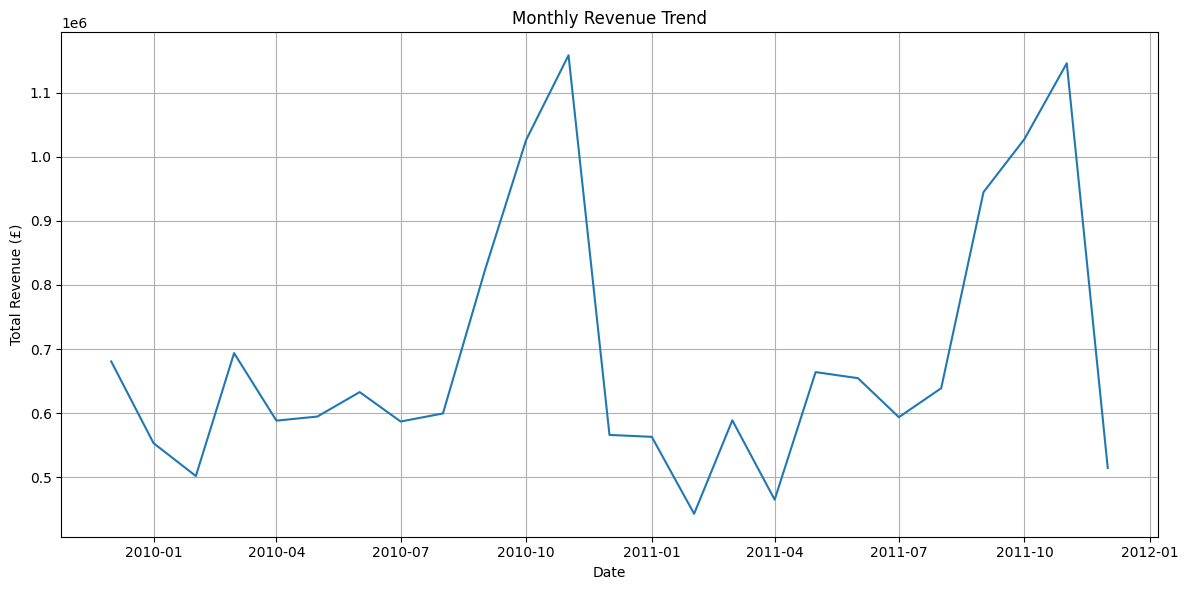

In [22]:
# Group data by year and month to calculate total monthly revenue
monthly_revenue = df.groupby(['Year', 'Month'])['TotalPrice'].sum().reset_index()
monthly_revenue['Date'] = monthly_revenue['Year'].astype(str) + '-' + monthly_revenue['Month'].astype(str).str.zfill(2)
monthly_revenue['Date'] = pd.to_datetime(monthly_revenue['Date'], format='%Y-%m')

# Create a line plot to visualize the monthly revenue trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='Date', y='TotalPrice')
plt.title('Monthly Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Total Revenue (£)')
plt.grid(True)
plt.tight_layout()
plt.savefig('monthly_revenue_trend.png')
plt.show()

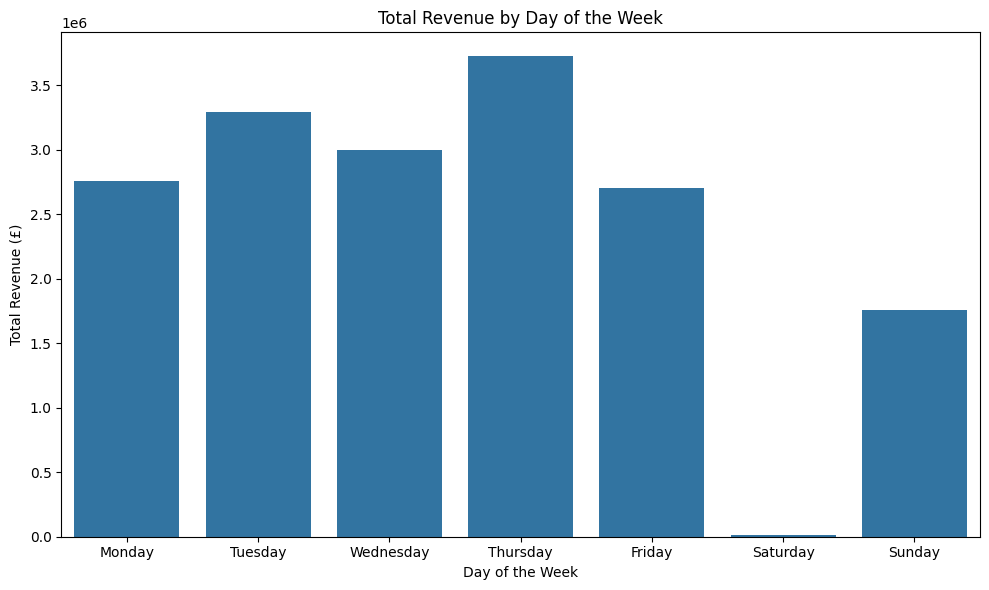

In [23]:
# Group data by day of the week to calculate total revenue for each day
daily_revenue = df.groupby('dayName')['TotalPrice'].sum().reset_index()

# Define the correct order for the days of the week to ensure the plot is chronological
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_revenue['dayName'] = pd.Categorical(daily_revenue['dayName'], categories=day_order, ordered=True)
daily_revenue = daily_revenue.sort_values('dayName')

# Create a bar chart to show revenue by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(data=daily_revenue, x='dayName', y='TotalPrice')
plt.title('Total Revenue by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue (£)')
plt.tight_layout()
plt.savefig('daily_revenue.png')
plt.show()

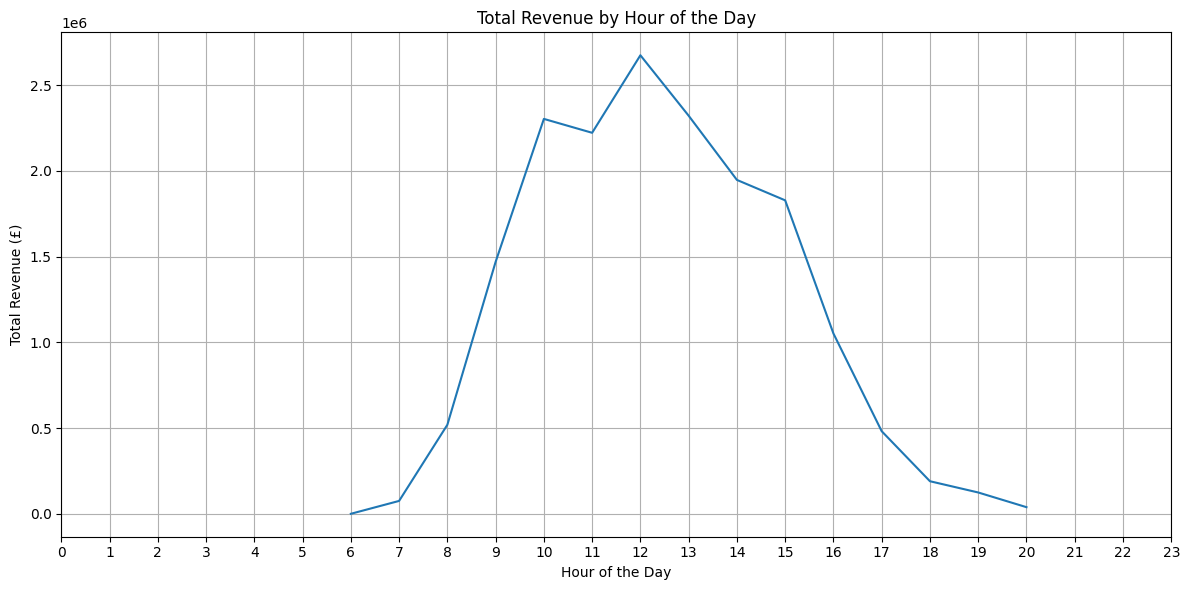

In [24]:
# Group data by hour of the day to calculate total hourly revenue
hourly_revenue = df.groupby('hourOfDay')['TotalPrice'].sum().reset_index()

# Create a line plot to visualize the revenue pattern throughout the day
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_revenue, x='hourOfDay', y='TotalPrice')
plt.title('Total Revenue by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Revenue (£)')
plt.xticks(range(24))
plt.grid(True)
plt.tight_layout()
plt.savefig('hourly_revenue.png')
plt.show()

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
df = pd.read_csv('cleaned_online_retail.csv')

# Ensure 'TotalPrice' and 'Quantity' are numeric and 'InvoiceDate' is datetime
df['TotalPrice'] = pd.to_numeric(df['TotalPrice'])
df['Quantity'] = pd.to_numeric(df['Quantity'])
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

Top 10 Products by Quantity:
 Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     105185
WHITE HANGING HEART T-LIGHT HOLDER     91757
PAPER CRAFT , LITTLE BIRDIE            80995
ASSORTED COLOUR BIRD ORNAMENT          78234
MEDIUM CERAMIC TOP STORAGE JAR         77916
JUMBO BAG RED RETROSPOT                74224
BROCADE RING PURSE                     70082
PACK OF 60 PINK PAISLEY CAKE CASES     54592
60 TEATIME FAIRY CAKE CASES            52828
PACK OF 72 RETRO SPOT CAKE CASES       45129
Name: Quantity, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9796\2609446192.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products_qty.values, y=top_products_qty.index, palette='viridis')


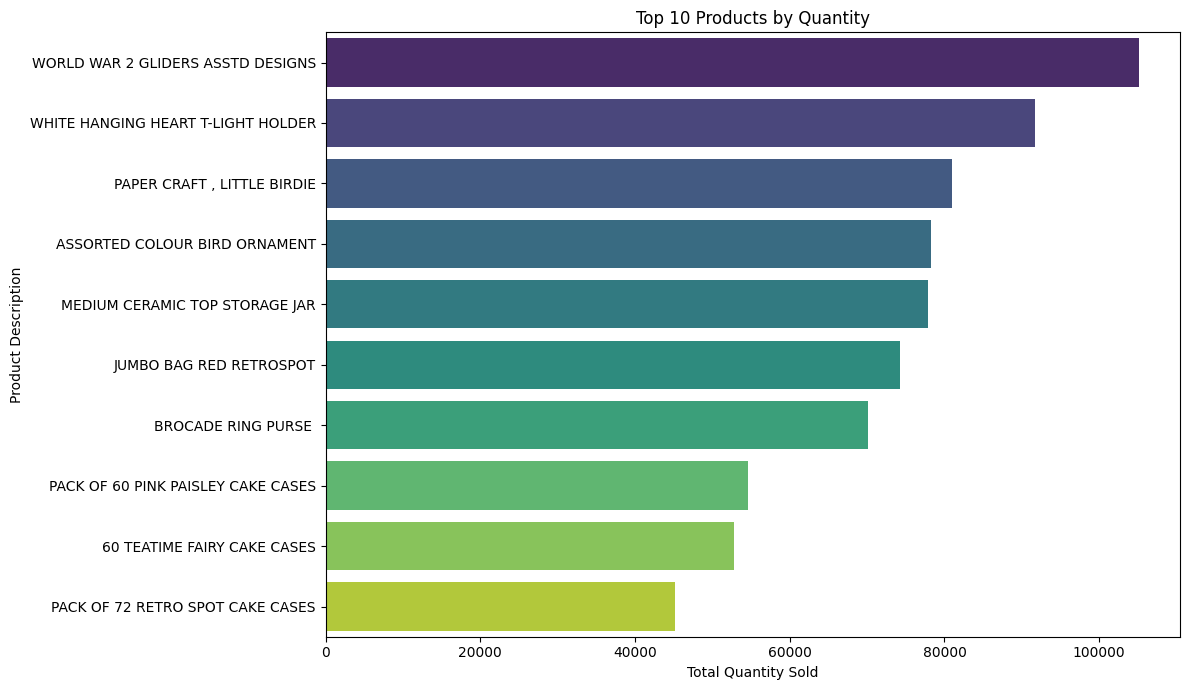


Top 10 Products by Revenue:
 Description
REGENCY CAKESTAND 3 TIER              277656.25
WHITE HANGING HEART T-LIGHT HOLDER    247048.01
PAPER CRAFT , LITTLE BIRDIE           168469.60
Manual                                151777.67
JUMBO BAG RED RETROSPOT               134307.44
ASSORTED COLOUR BIRD ORNAMENT         124351.86
PARTY BUNTING                         103283.38
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
PAPER CHAIN KIT 50'S CHRISTMAS         76598.18
CHILLI LIGHTS                          69084.30
Name: TotalPrice, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9796\2609446192.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products_revenue.values, y=top_products_revenue.index, palette='magma')


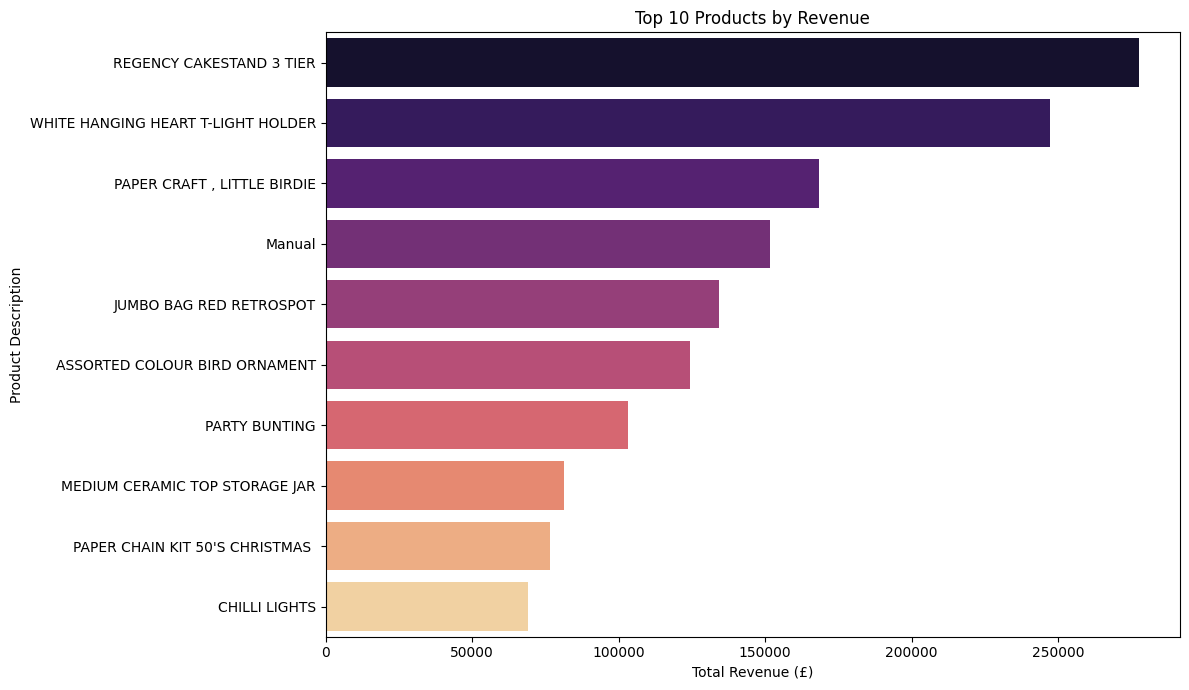

In [28]:
# 1. Identify Top 10 products by Quantity
top_products_qty = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 Products by Quantity:\n", top_products_qty)

# Plot Top 10 Products by Quantity
plt.figure(figsize=(12, 7))
sns.barplot(x=top_products_qty.values, y=top_products_qty.index, palette='viridis')
plt.title('Top 10 Products by Quantity')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.tight_layout()
plt.savefig('top_products_by_quantity.png')
plt.show()

# 2. Identify Top 10 products by Revenue
top_products_revenue = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Products by Revenue:\n", top_products_revenue)

# Plot Top 10 Products by Revenue
plt.figure(figsize=(12, 7))
sns.barplot(x=top_products_revenue.values, y=top_products_revenue.index, palette='magma')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue (£)')
plt.ylabel('Product Description')
plt.tight_layout()
plt.savefig('top_products_by_revenue.jpeg')
plt.show()

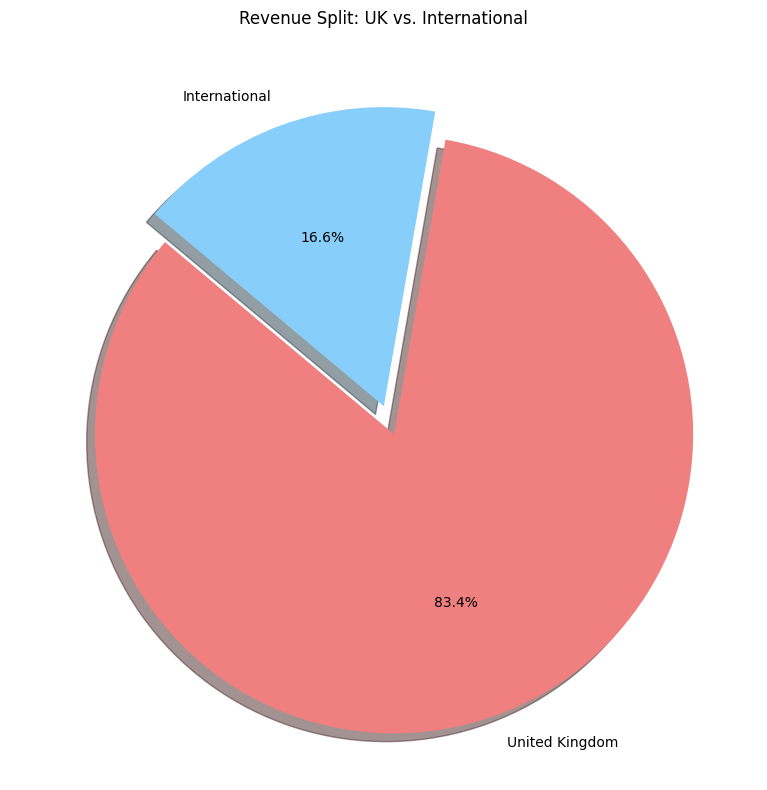


Top 10 Countries by Revenue:
 Country
United Kingdom    1.437992e+07
EIRE              6.165705e+05
Netherlands       5.499701e+05
Germany           3.864905e+05
France            3.243690e+05
Australia         1.689335e+05
Spain             9.940549e+04
Switzerland       9.340094e+04
Sweden            8.782482e+04
Denmark           6.742269e+04
Name: TotalPrice, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9796\3565019618.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='plasma')


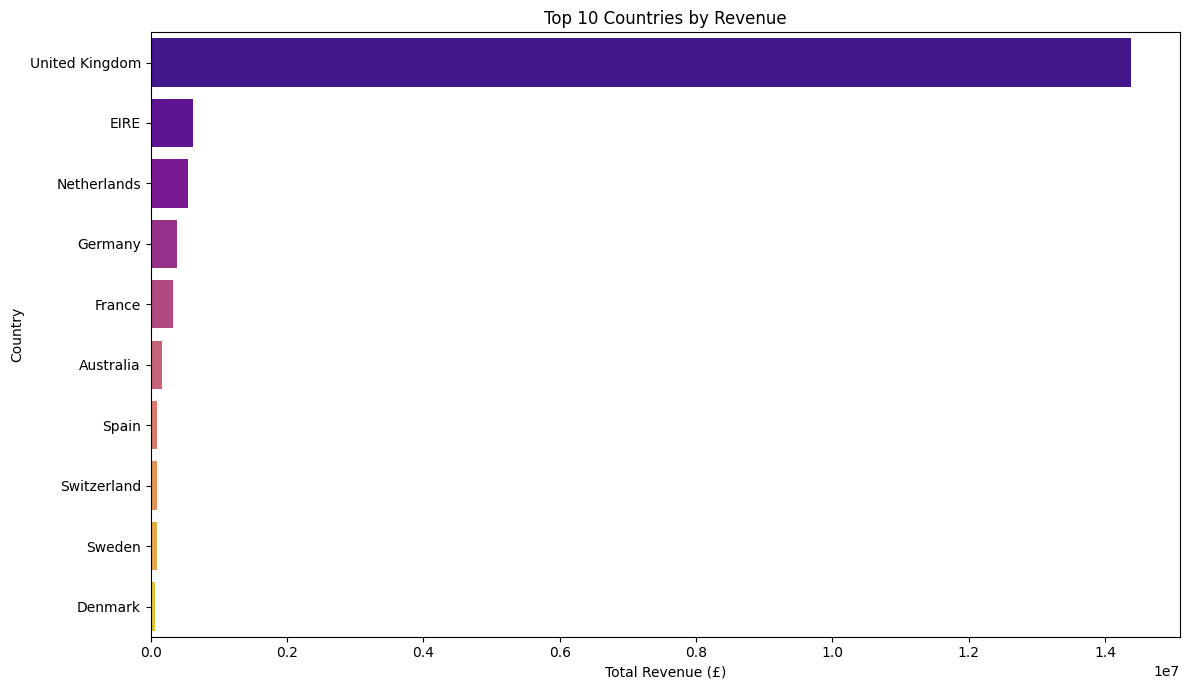

In [27]:
# 1. Analyze UK vs. International Sales
uk_revenue = df[df['Country'] == 'United Kingdom']['TotalPrice'].sum()
international_revenue = df[df['Country'] != 'United Kingdom']['TotalPrice'].sum()

# Create a pie chart
labels = ['United Kingdom', 'International']
sizes = [uk_revenue, international_revenue]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0) # explode the 1st slice (United Kingdom)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Revenue Split: UK vs. International')
plt.tight_layout()
plt.savefig('uk_vs_international_revenue.png')
plt.show()

# 2. Find Top 10 Countries by Revenue
country_revenue = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
top_10_countries = country_revenue.head(10)
print("\nTop 10 Countries by Revenue:\n", top_10_countries)

# Plot Top 10 Countries by Revenue
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='plasma')
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Total Revenue (£)')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('top_10_countries_revenue.png')
plt.show()
